Nama : Khalilullah Al Faath <br/>
Kelas : IF-44-08 <br/>
NIM : 1301204376

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

## Import cats and dogs

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img


local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2023-04-14 10:17:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 172.253.62.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   171MB/s    in 0.4s    

2023-04-14 10:17:52 (171 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# cat = 1
# dog = 0

import os

parent_dir = "/tmp/cats_and_dogs_filtered/train"
cat_dir = os.path.join(parent_dir, "cats")
dog_dir = os.path.join(parent_dir, "dogs")

x_train = []
y_train = []
i = 0
k = 0

for filename in os.listdir(cat_dir):
    if filename.endswith(".jpg"):
        x_train.append(os.path.join(cat_dir, filename))
        y_train.append(1)

        # # komen kode ini jika tidak mau dilimit
        # i+=1
        # if i == 250:
        #   break

for filename in os.listdir(dog_dir):
    if filename.endswith(".jpg"):
        x_train.append(os.path.join(dog_dir, filename))
        y_train.append(0)
        
        # k+=1
        # if k == 250:
        #   break

print(x_train[:5])
print(y_train[:5])



['/tmp/cats_and_dogs_filtered/train/cats/cat.820.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.621.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.967.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.872.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.286.jpg']
[1, 1, 1, 1, 1]


In [ ]:
print(len(x_train))
print(len(y_train))

2000
2000


In [ ]:
import random

random_numbers = []
for i in range(5):
    random_numbers.append(random.randint(0, len(x_train)))

print(random_numbers)

[418, 1220, 982, 1610, 1451]


In [ ]:
random_train_value = []
random_val_value = []

for i in random_numbers:
  random_train_value.append(x_train[i])
  random_val_value.append(y_train[i])

print(random_train_value)
print(random_val_value)

['/tmp/cats_and_dogs_filtered/train/cats/cat.135.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.50.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.205.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.296.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.839.jpg']
[1, 0, 1, 0, 0]


In [ ]:
# cat = 1
# dog = 0

import os

parent_dir = "/tmp/cats_and_dogs_filtered/validation"
cat_dir = os.path.join(parent_dir, "cats")
dog_dir = os.path.join(parent_dir, "dogs")

x_val = []
y_val = []
i = 0
k = 0
for filename in os.listdir(cat_dir):
    if filename.endswith(".jpg"):
        x_val.append(os.path.join(cat_dir, filename))
        y_val.append(1)

        # i+=1
        # if i == 50:
        #   break

for filename in os.listdir(dog_dir):
    if filename.endswith(".jpg"):
        x_val.append(os.path.join(dog_dir, filename))
        y_val.append(0)

        # k+=1
        # if k == 50:
        #   break

print(x_val[:5])
print(y_val[:5])

['/tmp/cats_and_dogs_filtered/validation/cats/cat.2322.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2239.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2267.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2178.jpg', '/tmp/cats_and_dogs_filtered/validation/cats/cat.2272.jpg']
[1, 1, 1, 1, 1]


In [ ]:
print(len(x_val))
print(len(y_val))

1000
1000


## Resize Image

In [ ]:
from PIL import Image

# Define the fixed image size
SIZE = (225, 225)

# Iterate over all images and resize them
for i in range(len(x_train)):
    img = Image.open(x_train[i])
    img = img.resize(SIZE)
    img.save(x_train[i])

for i in range(len(x_val)):
    img = Image.open(x_val[i])
    img = img.resize(SIZE)
    img.save(x_val[i])

# HOG

HOG (Histogram of Oriented Gradients) adalah sebuah teknik untuk mengekstraksi fitur dari gambar dalam pengolahan citra digital. Teknik ini sangat berguna dalam pengenalan objek dan deteksi objek dalam gambar.

Pada dasarnya, HOG feature extraction melibatkan pembuatan histogram orientasi gradien pada setiap sel gambar yang diambil dari gambar yang ingin diproses. Kemudian, histogram ini digabungkan menjadi blok histogram yang lebih besar. Fitur HOG yang dihasilkan kemudian dapat digunakan sebagai representasi visual dari gambar, yang dapat digunakan untuk mengenali atau mendeteksi objek dalam gambar.

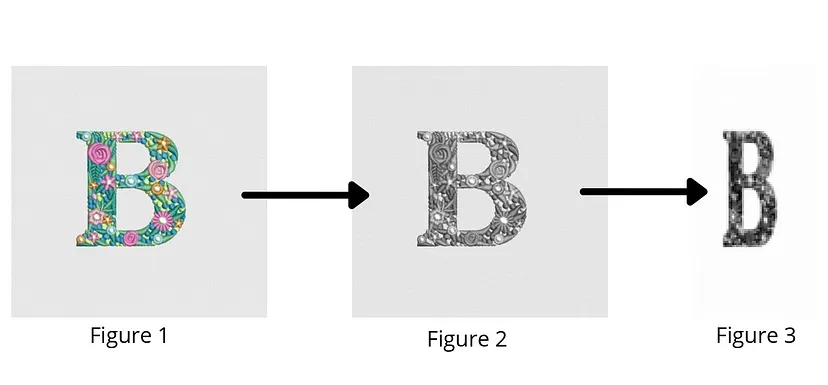

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt
from PIL import Image

## Contoh

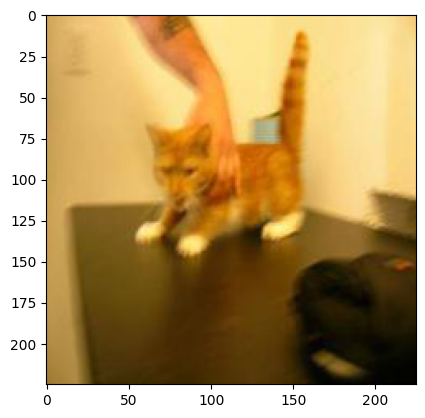

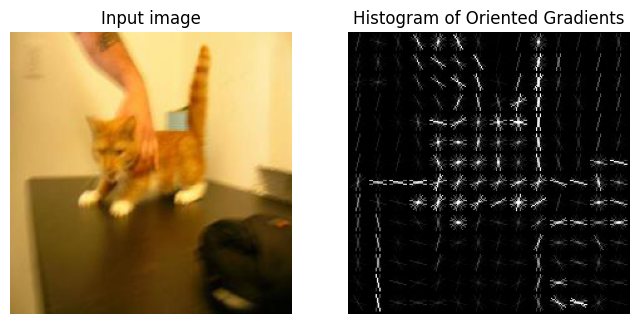

In [ ]:
 from skimage import exposure
 
 data = Image.open("/tmp/cats_and_dogs_filtered/train/cats/cat.0.jpg")
 plt.imshow(data)

 fd, hog_image = hog(data, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
 
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(data, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
print(x_train)

['/tmp/cats_and_dogs_filtered/train/cats/cat.820.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.621.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.967.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.872.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.286.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.306.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.12.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.631.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.143.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.957.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.56.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.138.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.661.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.681.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.455.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.609.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.782.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.201.jpg', '/tmp/cats_and_dogs_filtered/

In [ ]:
train_hog = []
test_hog = []

for i in range(len(x_train)):
    img = Image.open(x_train[i])
    # Compute HOG features for training data
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)    
    # Append HOG features to training HOG list
    train_hog.append(fd)

for i in range(len(x_val)):
    img = Image.open(x_val[i])
    # Compute HOG features for validation data
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1) 
    # Append HOG features to validation HOG list
    test_hog.append(fd)

# Convert the HOG feature lists to numpy arrays
train_hog = np.array(train_hog)
test_hog = np.array(test_hog)


# SIFT

Pada dasarnya, SIFT feature extraction bekerja dengan mengekstraksi titik-titik khusus pada gambar yang disebut sebagai "keypoints" dan mendeskripsikan fitur di sekitar setiap titik. Deskripsi fitur ini kemudian digunakan untuk mengidentifikasi dan mencocokkan keypoints yang sama pada gambar lain yang mungkin memiliki rotasi, skala, atau translasi yang berbeda.

Proses ekstraksi fitur SIFT melibatkan beberapa tahap, termasuk deteksi keypoints, pencarian orientasi utama, pembuatan deskripsi fitur, dan normalisasi deskripsi. Setelah fitur dihasilkan, mereka dapat digunakan untuk mengenali objek atau mengklasifikasikan gambar.

## Contoh

In [ ]:
import cv2

img = cv2.imread("/tmp/cats_and_dogs_filtered/train/cats/cat.0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
# detect features from the image
keypoints, descriptors = sift.detectAndCompute(gray, None)

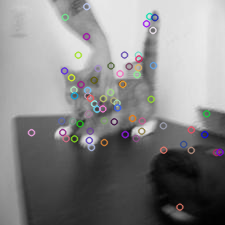

In [ ]:
from google.colab.patches import cv2_imshow

# draw the detected key points
sift_image = cv2.drawKeypoints(gray, keypoints, img)
# show the image
cv2_imshow(sift_image)

## Proses SIFT

In [ ]:
print(len(x_train))

2000


In [ ]:
train_sift = []
test_sift = []

for i in range(len(x_train)):
    img = cv2.imread(x_train[i])
    # gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


    # Extract SIFT features
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptor = sift.detectAndCompute(gray, None)

    train_sift.append(descriptor)

for i in range(len(x_val)):
    img = cv2.imread(x_val[i])
    # gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


    # Extract SIFT features
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptor = sift.detectAndCompute(gray, None)

    test_sift.append(descriptor)

# Feature transformation using Bag-of-Visual-Words
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(np.vstack(train_sift))

X_train_bow = []
for features in train_sift:
    bow_features = kmeans.predict(features)
    X_train_bow.append(np.bincount(bow_features, minlength=50))

X_test_bow = []
for features in test_sift:
    bow_features = kmeans.predict(features)
    X_test_bow.append(np.bincount(bow_features, minlength=50))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Classification

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

## Without feature extraction

In [ ]:
import cv2
x_train_vectors = []
x_val_vectors = []

for i in x_train:
  img = cv2.imread(i)
  img_flat = img.flatten()
  x_train_vectors.append(img_flat)

for i in x_val:
  img = cv2.imread(i)
  img_flat = img.flatten()
  x_val_vectors.append(img_flat)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(x_train_vectors, y_train)

SVC()

In [ ]:
predicted = svm_model.predict(x_val_vectors)
accuracy = accuracy_score(y_val, predicted)
print(accuracy)

0.617


## With HOG

In [ ]:
svm_model_using_hog = svm.SVC()
svm_model_using_hog.fit(train_hog, y_train)

SVC()

In [ ]:
predicted = svm_model_using_hog.predict(test_hog)
accuracy = accuracy_score(y_val, predicted)
print(accuracy)

0.721


## With SIFT

In [ ]:
print(len(X_train_bow))

2000


In [ ]:
svm_model_using_SIFT = svm.SVC()
svm_model_using_SIFT.fit(X_train_bow, y_train)


SVC()

In [ ]:
predicted = svm_model_using_SIFT.predict(X_test_bow)
accuracy = accuracy_score(y_val, predicted)
print(accuracy)

0.69


Dapat dilihat bahwa untuk dataset Cats and Dogs ini memiliki kelebihan jika menggunakan feature extraction daripada tidak menggunakan apa-apa

Perbedaan nilainya dapat dilihat bahwa tanpa feature extraction memiliki akurasi sekitar 0.617, dengan menggunakan HOG memiliki akurasi 0.721, dan menggunakan SIFT dengan akurasi 0.69. Ini dilakukan tanpa preprocessing apa-apa sebelumnya, kecuali resize image dengan nilai ukuran yang sama, yaitu (255,255)